# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

## Load the Data

In [169]:
df = pd.read_csv('Traffic_Accident.csv')
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,58660,200511DJ27240,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,...,55.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012363,2005.0
51996,101443,20053102C2156,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,...,6002.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01028141,2005.0
51997,437,200501BS70452,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01002840,2005.0
51998,61353,2.01E+12,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,E01027681,2005.0


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [170]:
#Find the dataset information and observe the datatypes.
df.info()
# As can be seen that we have 18 numerical data type and 12 categrical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [171]:
#Check the shape of the data to understand its structure.
df.shape
# As can we see that there are 52000 rows and 30 columns.

(52000, 30)

In [172]:
#View the the data with various functions to get an initial sense of the data.
df.head()
# This shows the first 5 records of the dataset with all the columns

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [173]:
#View the the data with various functions to get an initial sense of the data.
df.tail()
# This shows the last 5 records of the dataset with all the columns

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
51995,58660,200511DJ27240,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,...,55.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012363,2005.0
51996,101443,20053102C2156,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,...,6002.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01028141,2005.0
51997,437,200501BS70452,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01002840,2005.0
51998,61353,2.01E+12,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,E01027681,2005.0
51999,75359,2005160D02810,509970.0,428420.0,-0.334114,53.740566,16,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012853,2005.0


In [174]:
#View the the data with various functions to get an initial sense of the data.
df.sample(5)
# This shows random 5 records of the dataset with all the columns. The 5 is optional, we can keep it empty and the
# Python will select any randon records.

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
27996,100145,20053102B0737,479790.0,354730.0,-0.810201,53.083818,31,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Wet/Damp,2.0,Yes,E01028310,2005.0
14889,104434,200532C519205,555520.0,363310.0,0.323827,53.144217,32,2,2.0,2,...,52.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,1.0,Yes,E01026094,2005.0
21696,5368,200501GD10923,534870.0,184000.0,-0.056678,51.538742,1,3,2.0,1,...,107.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,No,E01001818,2005.0
48992,54111,2.01E+12,432490.0,567170.0,-1.493649,54.998074,10,2,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01008542,2005.0
3794,36529,200505CH00794,347770.0,392470.0,-2.787508,53.426412,5,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01006499,2005.0


In [175]:
display(df) # This will show the first 5 and last 5 of the dataset

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,58660,200511DJ27240,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,...,55.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012363,2005.0
51996,101443,20053102C2156,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,...,6002.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01028141,2005.0
51997,437,200501BS70452,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01002840,2005.0
51998,61353,2.01E+12,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,E01027681,2005.0


In [176]:
#Perform summary statistics on the dataset to grasp central tendencies and variability.
df.describe()
# The describe function will show statisitical analysis such as "count","mean","standard deviation" and ect


,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51198.000000,52000.000000,51463.000000,51999.000000,51999.000000,51999.000000,50959.000000,51999.000000,51999.000000,51999.000000,51999.0
mean,52309.605596,439654.064615,338794.330769,-1.425829,52.940991,11.101904,2.848481,1.843060,1.358615,4.120009,155.142060,4.084155,1025.653859,36.768971,2.933383,340.922479,1.249736,2005.0
std,30282.566278,66711.811588,115731.113185,0.975537,1.044812,9.558172,0.390890,0.708149,0.804162,1.934134,114.153616,1.415258,1882.560604,12.707643,3.138719,1205.580339,0.432953,0.0
min,0.000000,296780.000000,156110.000000,-3.596752,51.289060,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.0
25%,25924.750000,388110.000000,194160.000000,-2.179555,51.630849,1.000000,3.000000,1.000000,1.000000,2.000000,32.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,52285.500000,429505.000000,361950.000000,-1.552874,53.149640,10.000000,3.000000,2.000000,1.000000,4.000000,142.000000,3.000000,74.000000,30.000000,4.000000,0.000000,1.000000,2005.0
75%,78552.250000,516010.000000,415952.500000,-0.312861,53.638514,20.000000,3.000000,2.000000,1.000000,6.000000,254.000000,6.000000,642.000000,40.000000,6.000000,0.000000,1.000000,2005.0
max,104949.000000,559570.000000,656390.000000,0.350177,55.800830,48.000000,3.000000,18.000000,23.000000,7.000000,570.000000,6.000000,9999.000000,70.000000,6.000000,9711.000000,3.000000,2005.0


In [177]:
#Check for duplicated data.
df.duplicated().sum()
# There is no duplicated value in the dataset. So we don't need to drop any duplicated values

0

In [178]:
#Check for null values
df.isna().sum()
#As can we see we have missing values

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [179]:
# impute missing data
# First let's check if the missing data is numerical or catergrical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

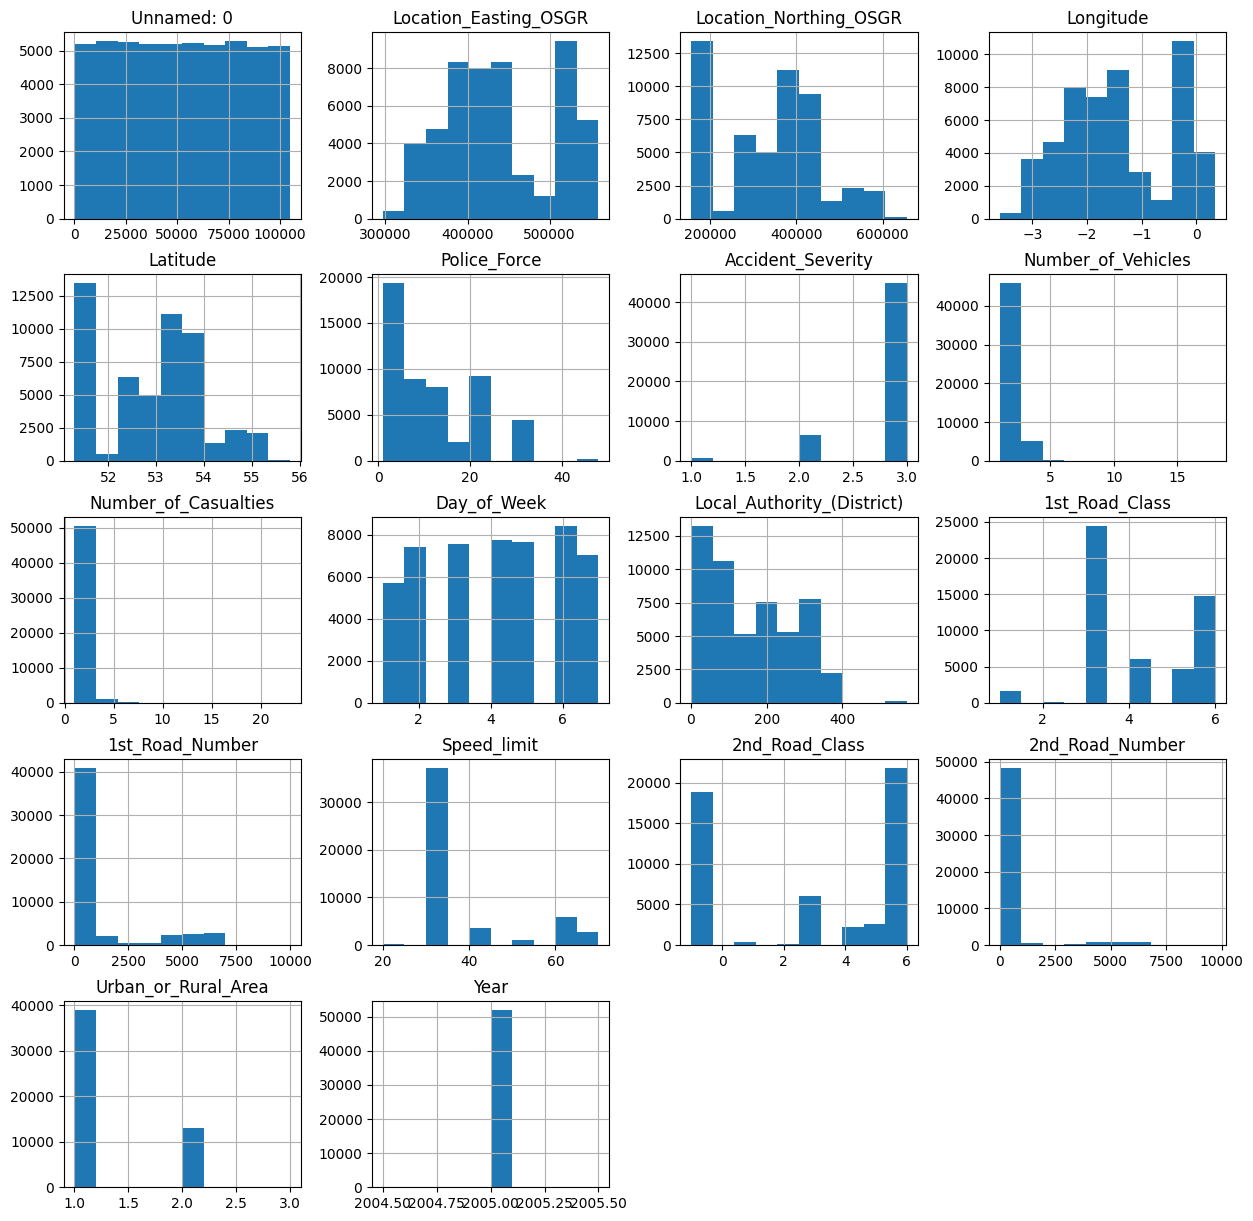

In [180]:
# let's handle first the numerical value
# First we need to visulize it to see if it is normal distributed or not.

# visulize the numerical values as hist
df.hist(figsize=(15,15))
plt.show()

In [181]:
# impute the numerical values with the median. Because most of the missing values when we visulize it are not normally distrubuted
# There are some tests to run to check the normality we haven't covered in class. So we will go by eyes.
df['Number_of_Vehicles'] = df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].median())
df['Day_of_Week'] = df['Day_of_Week'].fillna(df['Day_of_Week'].median())
df['Local_Authority_(District)'] = df['Local_Authority_(District)'].fillna(df['Local_Authority_(District)'].median())
df['1st_Road_Class'] = df['1st_Road_Class'].fillna(df['1st_Road_Class'].median())
df['1st_Road_Number'] = df['1st_Road_Number'].fillna(df['1st_Road_Number'].median())
df['Speed_limit'] = df['Speed_limit'].fillna(df['Speed_limit'].median())
df['2nd_Road_Class'] = df['2nd_Road_Class'].fillna(df['2nd_Road_Class'].median())
df['2nd_Road_Number'] = df['2nd_Road_Number'].fillna(df['2nd_Road_Number'].median())
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].median())
df['Year'] = df['Year'].fillna(df['Year'].median())
# check if there is any missing values in numerical values
df.isna().sum()


,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0


In [182]:
# Handling missing values categrical columns

df['Time'] = df['Time'].fillna(df['Time'].mode()[0])
df['Local_Authority_(Highway)'] = df['Local_Authority_(Highway)'].fillna(df['Local_Authority_(Highway)'].mode()[0])
df['Road_Type'] = df['Road_Type'].fillna(df['Road_Type'].mode()[0])
df['Pedestrian_Crossing-Human_Control'] = df['Pedestrian_Crossing-Human_Control'].fillna(df['Pedestrian_Crossing-Human_Control'].mode()[0])
df['Pedestrian_Crossing-Physical_Facilities'] = df['Pedestrian_Crossing-Physical_Facilities'].fillna(df['Pedestrian_Crossing-Physical_Facilities'].mode()[0])
df['Light_Conditions'] = df['Light_Conditions'].fillna(df['Light_Conditions'].mode()[0])
df['Weather_Conditions'] = df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0])
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0])
df['Did_Police_Officer_Attend_Scene_of_Accident'] = df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(df['Did_Police_Officer_Attend_Scene_of_Accident'].mode()[0])
df['LSOA_of_Accident_Location'] = df['LSOA_of_Accident_Location'].fillna(df['LSOA_of_Accident_Location'].mode()[0])
# check if there is any missing values in categrical values
df.isna().sum()


,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0


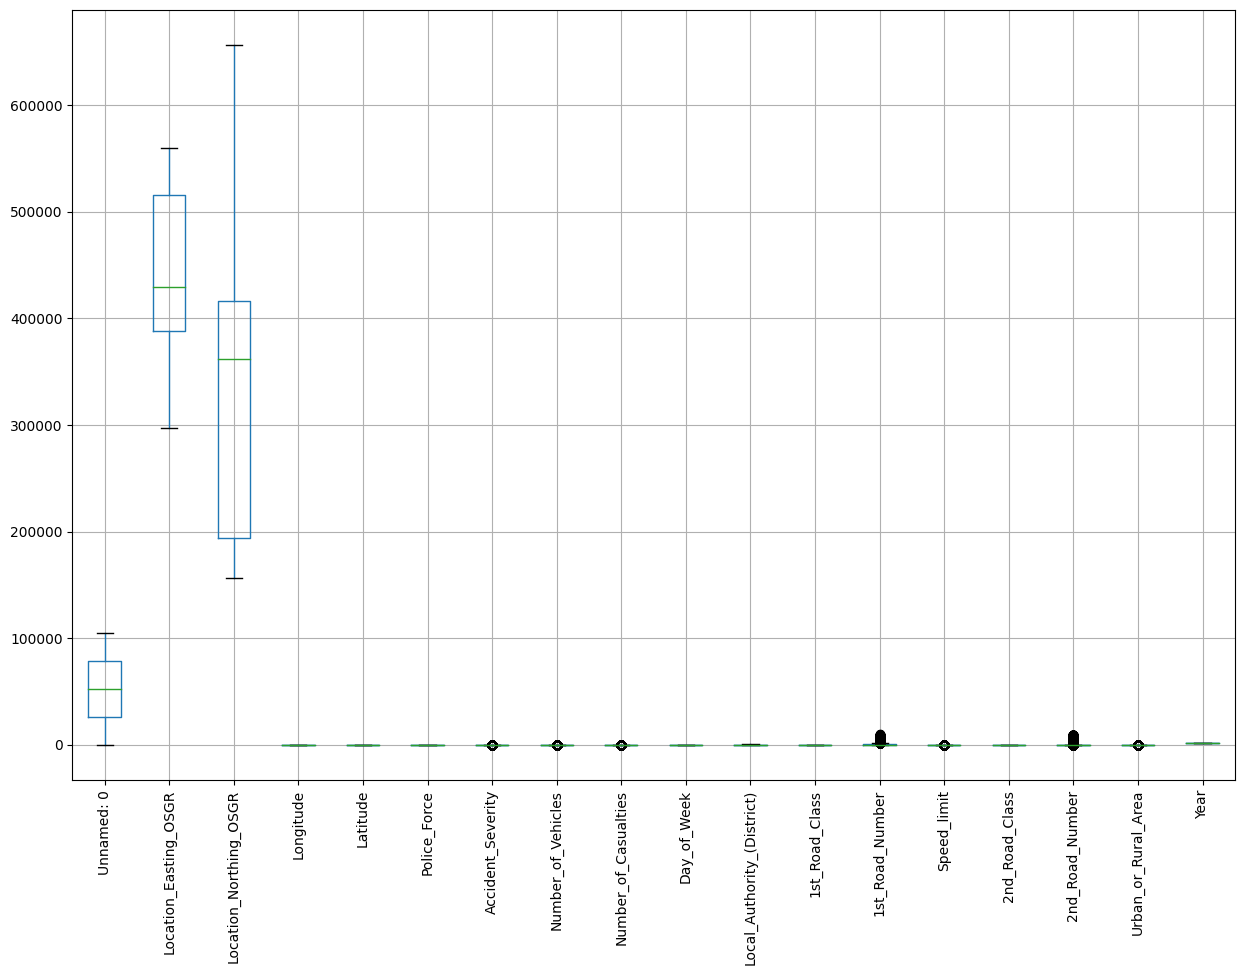

In [183]:
# we can use boxplot to detect outliers for numerical values
plt.figure(figsize=(15,10))
df.boxplot()
plt.xticks(rotation=90)
plt.show()


In [184]:
# remove outliers using the quantile and lower bound and upper bound
for column in df.select_dtypes(include=['number']).columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

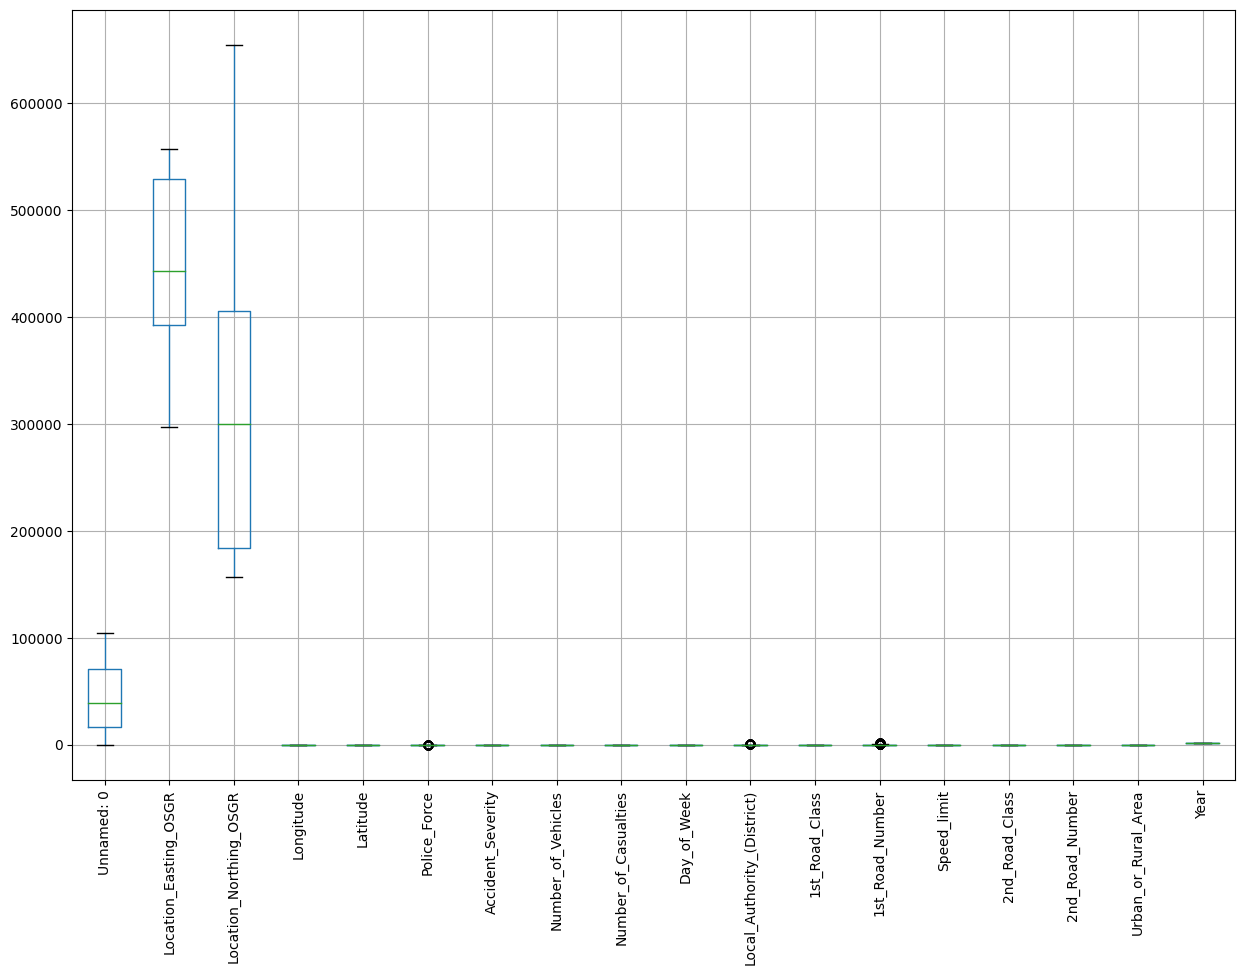

In [185]:
# Check again using boxplot
plt.figure(figsize=(15,10))
df.boxplot()
plt.xticks(rotation=90)
plt.show()
# Although maybe it is not clear but we can notice the difference from first box plot and second one

In [186]:
# Label encoder
le = LabelEncoder()
for i in df.select_dtypes(include=['object']).columns:
    df[i] = le.fit_transform(df[[i]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [187]:

ss = StandardScaler()
for i in df.select_dtypes(exclude=['object']).columns:
    print(i)
    df[i] = ss.fit_transform(df[[i]])



Unnamed: 0
Accident_Index
Location_Easting_OSGR
Location_Northing_OSGR
Longitude
Latitude
Police_Force
Accident_Severity
Number_of_Vehicles
Number_of_Casualties
Date
Day_of_Week
Time
Local_Authority_(District)
Local_Authority_(Highway)
1st_Road_Class
1st_Road_Number
Road_Type
Speed_limit
2nd_Road_Class
2nd_Road_Number
Pedestrian_Crossing-Human_Control
Pedestrian_Crossing-Physical_Facilities
Light_Conditions
Weather_Conditions
Road_Surface_Conditions
Urban_or_Rural_Area
Did_Police_Officer_Attend_Scene_of_Accident
LSOA_of_Accident_Location
Year


In [188]:
# PCA
from sklearn.decomposition import PCA
X = pd.DataFrame(df).to_numpy()
Z = (X - X.mean()) / X.std()
# Let's say, components = 2
pca = PCA(n_components=2)
pca_X = pca.fit_transform(Z)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [189]:
# The primary goal of this task is to analyze the accidents based on their geographical location.
# Then I think it is relevent to choose features based on geographical features for clustering accidents based on location.
# We will select 'Location_Easting_OSGR' and 'Location_Northing_OSGR' as our main features.

X = df[['Location_Easting_OSGR', 'Location_Northing_OSGR']]

# These features represent the geographical coordinates of accident locations,
# allowing us to cluster accidents.
# However, slelecting the conditions ( such as weather, road conditions, etc.) of the location may also be relevent but we will use them
# as another model to distiguish between the two Other features might be relevant for other types of analysis,
# but for location-based clustering, these two features are the most important.


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

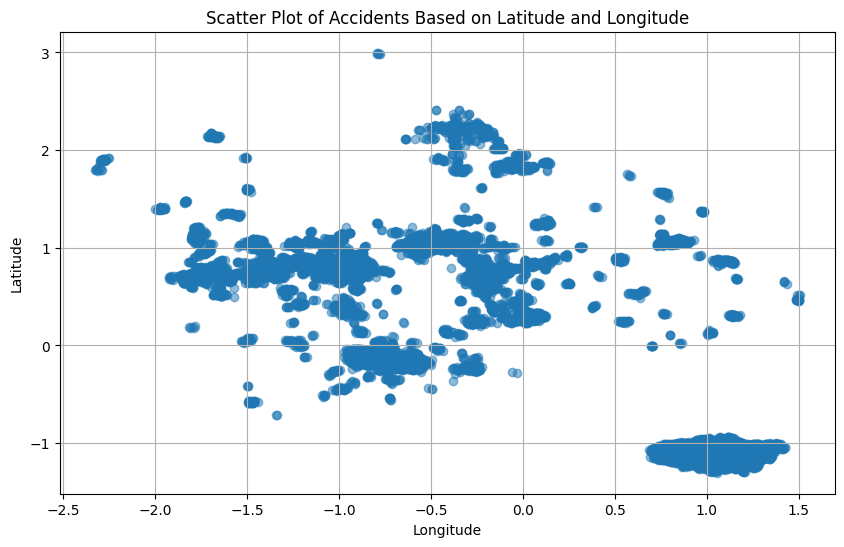

In [190]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Accidents Based on Latitude and Longitude')
plt.grid(True)
plt.show()

# For this plot this shows me the location of the traffic accidents.
# Not sure what city or country it is but latitude and longtitude gives you the location of the place or accident in our example

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

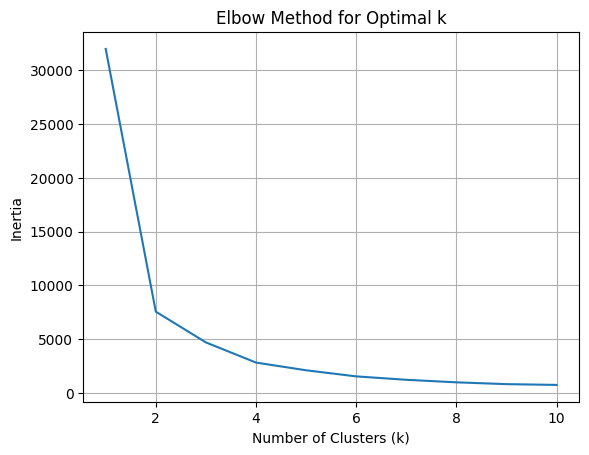

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=1132)

In [191]:
# Find the `n_clusters` parameter using the elbow method.
inertia = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=1132)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Based on the elbow method, the optimal number of clusters appears to be around 3 or 4,
# Although on number of cluster at 4 is slight elbow but we will choose 3 clusters

# Train the model.
kmeans = KMeans(n_clusters=3, random_state=1132)  # Choosing 3 clusters
kmeans.fit(X)


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [192]:
# According to the documentation the evaluation of the cluster is determined by the
# silhouette score.
# According to the documentation
# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
#Negative values generally indicate that a sample has been assigned to the wrong cluster,
#as a different cluster is more similar.
from sklearn.metrics import silhouette_score
# Evaluate the clustering result using the silhouette score
y_kmeans = kmeans.predict(X)

silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)
# For this number the score is fine and it is not near zero or negative number

Silhouette Score: 0.60056401804692


## Plot the data points with their predicted cluster center

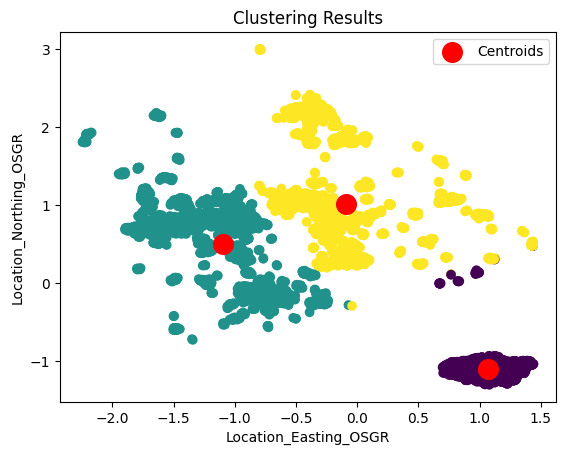

In [193]:
# Plot the data points with their predicted cluster center
plt.scatter(X['Location_Easting_OSGR'], X['Location_Northing_OSGR'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Location_Easting_OSGR')
plt.ylabel('Location_Northing_OSGR')
plt.title('Clustering Results')
plt.legend()
plt.show()


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

In [194]:


##---------ANS----------##

# I choose 'Location_Easting_OSGR' and 'Location_Northing_OSGR' as my features
# The reason why because the goal of this task is to do analysis the accidents based on geopgriphical location

#Number of Clusters Choices:
#How did you determine the optimal number?

##---------ANS----------##

 # To determine your number of cluster, the elbow method will tell you how many clusters you neeed
 # How to determine, from the graph you see the elbow ( the curve), the lowest curve on the graph.
 # As you can see that the most shift of the curve at cluster 3, we can do it at 4 too but 3 is best cluster based on what I see.

#Evaluation:
#Which metrics did you use to evaluate the clustering results, and why?
#How do these metrics help in understanding the effectiveness of your clustering approach?

##---------ANS----------##

# We used the silhouette score to evaluate the clustering results.
# The silhouette score measures how well-separated the clusters are.
# A higher silhouette score indicates that the clusters are more distinct and well-defined.
# It helps us understand how effectively our clustering approach has grouped similar data points together and separated dissimilar ones.
# A score closer to 1 indicates better clustering, while a score closer to -1 suggests poor clustering.

#Improvements and Recommendations:
#Suggest any improvements or future work that could be done with this dataset.
#What other methods or algorithms would you consider applying?


##---------ANS----------##

# We can improve the model by considering the condtions of each locations
# Alss, applying Feature Engineering to get a new feature with will help us determine the model more accuratly
# We can use predictions that contribute the locations of the accidents
